In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [56]:
from fingerprinting_skeleton import *

In [102]:
%pwd

'/Users/andreas/PycharmProjects/aims_lab/set2/testWifiData'

In [104]:
%cd ..

/Users/andreas/PycharmProjects/aims_lab


In [105]:
# Number of measurements per location
nSamples = 60

# ---- Configure Parameters -----
# Select Dataset (set1 or set2)
# parser = argparse.ArgumentParser()
# parser.add_argument('-s','--data_set', choices={"set1", "set2"}, type=str,
#     default='set1')
# args = parser.parse_args()
data_set = 'set1'

# Visualize the RSS in location = loc
loc = 2

# ----- Run System ------

# set1 contains 3 access points and set2 5 access points
if data_set == "set1":
    nAP = 3
else:
    nAP = 5

init()

# Load the RSS measurements from file
(trainDB, testDB) = load_wifi_data(data_set, nSamples, nAP)


************************************************************
 The Horus Localization System
 Sensor Networks Course - University of Oxford
************************************************************


-> Loading files...done


-> Displaying fingerprints...

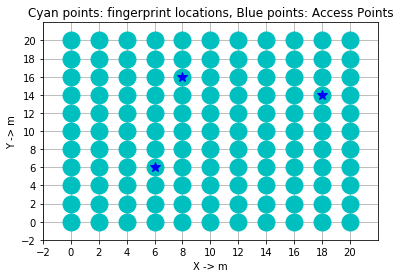

done


In [106]:
 # Show fingerprint locations
show_fingerprints(trainDB, nAP)

-> Visualizing histograms...

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


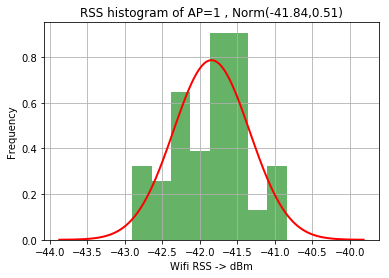

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


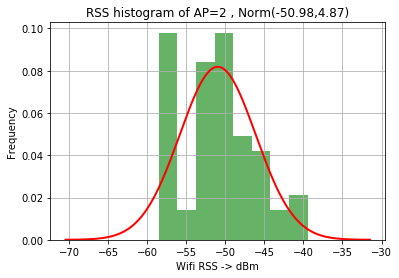

/Users/andreas/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


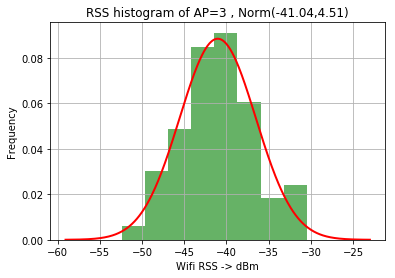

done


In [107]:
# Plot the RSS histogram and approximate it with a Gaussian
plot_histogram(trainDB, loc, nAP, nSamples)

In [108]:
# Fit Gaussian distribution to the RSS measurements
wifiDB = fit_data(trainDB, nSamples, nAP)

-> Modeling RSS with Gaussian dist...done


In [109]:
wifiDB.shape

(121, 9)

In [110]:
wifiDB[0]

array([  0.        ,   0.        ,   0.        , -44.4925    ,
         0.52544148, -62.08033333,   4.84854032, -43.36283333,
         4.39427434])

In [111]:
testDB.shape

(63, 153)

In [112]:
len(testDB)

63

In [113]:
testDB[0]

array([  0.  ,   3.  ,   3.  , -38.05, -39.02, -38.6 , -37.72, -39.11,
       -38.91, -37.81, -38.1 , -37.88, -38.93, -38.76, -37.86, -37.78,
       -37.94, -38.31, -37.95, -38.48, -37.76, -38.01, -38.03, -38.66,
       -38.2 , -37.86, -37.94, -39.16, -37.71, -38.5 , -38.02, -38.5 ,
       -37.79, -38.49, -37.99, -37.66, -38.05, -37.6 , -37.99, -38.88,
       -38.57, -38.33, -38.27, -38.39, -38.31, -37.73, -36.93, -38.88,
       -38.22, -37.24, -37.8 , -38.32, -37.9 , -54.45, -62.02, -60.45,
       -64.34, -59.09, -67.13, -58.38, -61.88, -61.74, -53.11, -56.91,
       -55.01, -61.32, -62.19, -63.42, -62.69, -64.75, -51.1 , -52.19,
       -59.55, -53.85, -60.69, -60.23, -55.47, -61.51, -61.5 , -57.95,
       -62.9 , -54.94, -69.44, -51.18, -59.38, -66.43, -59.64, -59.71,
       -63.8 , -62.79, -61.97, -55.61, -53.73, -61.61, -67.  , -60.54,
       -65.61, -62.83, -51.73, -57.53, -56.34, -66.26, -72.39, -42.42,
       -44.18, -37.94, -45.23, -43.83, -45.35, -38.55, -44.28, -39.17,
      

In [114]:
# Run the localization algorithm
# Estimate the unknown location given RSS measurements at that location
(actualLoc, predictedLoc) = predict(wifiDB, testDB, nAP, nSamples)

-> Running Horus...done


In [115]:
# Run the localization algorithm
# Estimate the unknown location given RSS measurements at that location
(actualLoc2, predictedLoc2) = predict2(wifiDB, testDB, nAP)

-> Running Horus...-> Modeling RSS with Gaussian dist...done
done


-> Visualizing estimated trajectory...

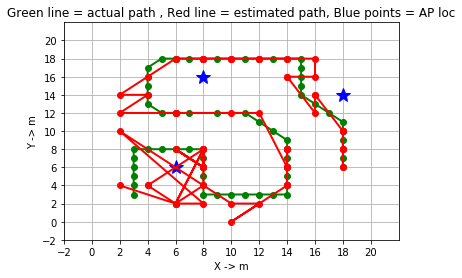

done
-> Visualizing estimated trajectory...

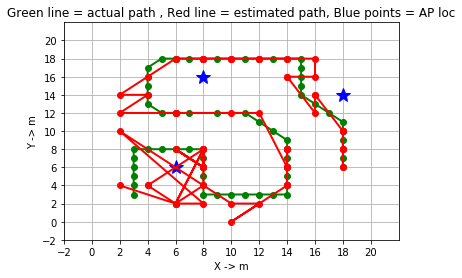

done


In [116]:
plot_path(actualLoc, predictedLoc, nAP)
plot_path(actualLoc2, predictedLoc2, nAP)

-> Calculating localization error...

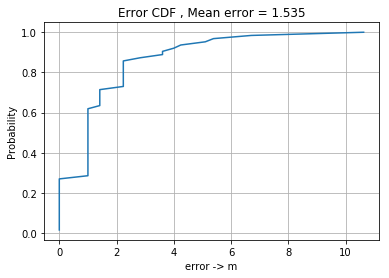

done
-> Calculating localization error...

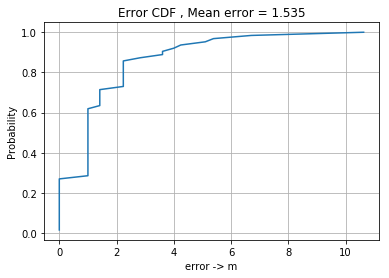

done


In [117]:
plot_error(actualLoc, predictedLoc)
plot_error(actualLoc2, predictedLoc2)